## **Generative Modeling**
Taken from [AI builders' repository](https://github.com/ai-builders/curriculum/blob/main/notebooks/06v_GAN_fastai.ipynb)

**Authored by**: Titipat

In [ ]:
!pip install wget fastai fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bb92f5fcc477f768427dad821a946d4c9ef41fd9ec8601678c21ceec99f4b077
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


### **Get CelebA dataset**

In [ ]:
#REF https://colab.research.google.com/github/GRAAL-Research/poutyne/blob/master/examples/classification_and_regression.ipynb#scrollTo=7hyL47KFUi-L

import wget
import os
import zipfile

data_root = "datasets"

base_url = "https://graal.ift.ulaval.ca/public/celeba/"

file_list = [
    "img_align_celeba.zip",
    "list_attr_celeba.txt",
    "identity_CelebA.txt",
    "list_bbox_celeba.txt",
    "list_landmarks_align_celeba.txt",
    "list_eval_partition.txt",
]

# Path to folder with the dataset
dataset_folder = f"{data_root}/celeba"
os.makedirs(dataset_folder, exist_ok=True)

for file in file_list:
    url = f"{base_url}/{file}"
    if not os.path.exists(f"{dataset_folder}/{file}"):
        wget.download(url, f"{dataset_folder}/{file}")

with zipfile.ZipFile(f"{dataset_folder}/img_align_celeba.zip", "r") as ziphandler:
    ziphandler.extractall(dataset_folder)

### **Use FastAI for Training**

In [ ]:
from fastbook import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callback.all import *

In [ ]:
bs, size = 128, 64
dblock = DataBlock(
    blocks = (TransformBlock, ImageBlock),
    get_x = generate_noise,
    get_items = get_image_files,
    splitter = IndexSplitter([]),
    item_tfms=Resize(size, method=ResizeMethod.Crop), 
    batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
)

In [ ]:
dls = dblock.dataloaders("datasets/celeba/img_align_celeba", bs=bs)

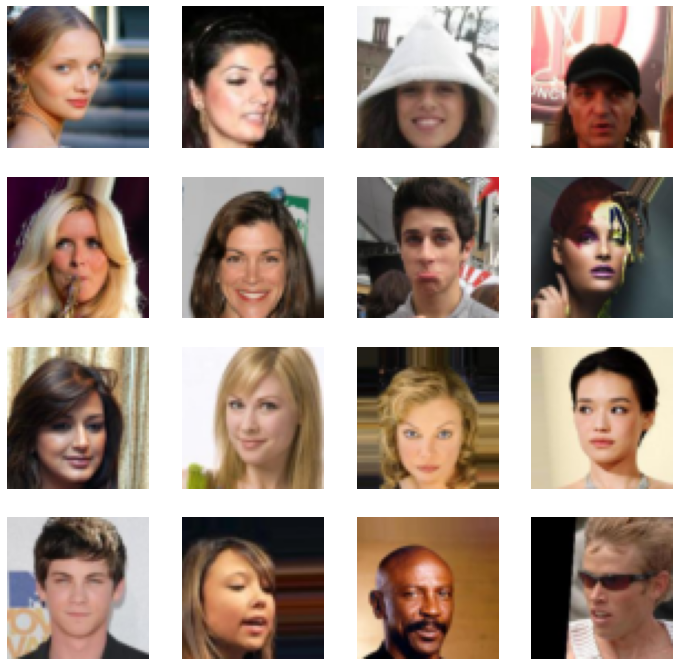

In [ ]:
dls.show_batch(max_n=16)

In [ ]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic = basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [ ]:
learn = GANLearner.wgan(dls, generator, critic, opt_func=RMSProp)

In [ ]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [ ]:
learn.fit(10, 2e-4, wd=0.)

In [ ]:
learn.show_results(max_n=9, ds_idx=0)